# 决策树Decision Tree

# 一、概念
## 1、决策树是一种树型结构，其中每个内部结点表示在一个属性上的测试，每个分支代表一个测试输出，每个叶结点代表一种类别。
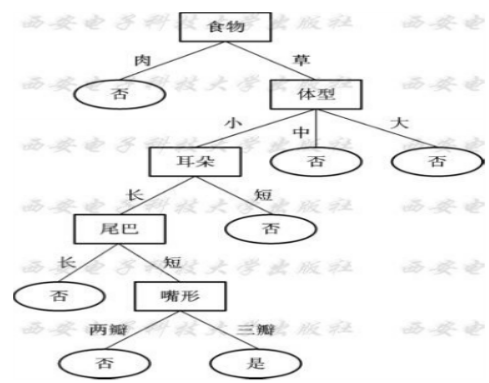
## 2、几何理解
### * 决策树建立的过程就是决策树各个分枝依次形成的过程
### * 决策树的每个分枝在一定规则下完成对n维特征空间的区域划分
### * 决策树建立好后，n维特征空间会被划分成若干个小的边界平行或垂直于坐标轴的矩形区域
### * 确定每一步特征空间划分标准时，都同时兼顾由此将形成的两个区域，希望划分形成的两个区域所包含的样本点尽可能同时“纯正”
### * 决策树是描述分类过程的一种数据结构，从上端的根节点开始，各种分类原则被引用进来，并依这些分类原则将根节点的数据集划分为子集，这一划分过程直到某种约束条件满足而结束。
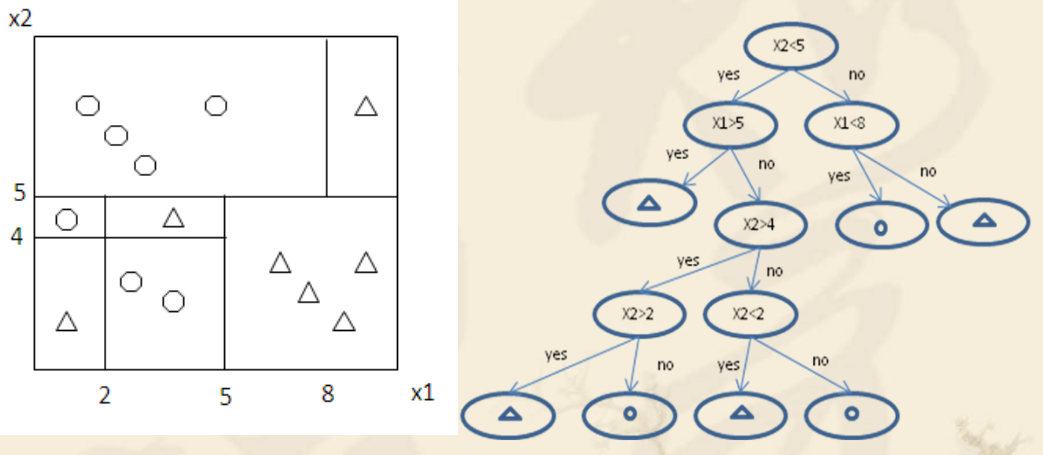
## 3、决策树结构：
<img style="float: right;"  src="img/decisionTree4.png"  width="40%">
###    节点：用于存贮信息或知识（叶子节点、非叶子节点）
###    分枝：用于连接各个节点。
###    分裂属性      分裂谓词
* 每一个节点都代表了一个数据集。
* 根节点1代表了初始数据集D   其它节点都是数据集D的子集。
*  例如，节点2代表数据集D中年龄小于40岁的那部分样本组成的数据集。子节点是父节点的子集。

# 二、原理
##  核心问题：从哪个属性进行分裂，可以使得分裂后的节点“纯度”更高??“纯度”指的是节点中样本所属分类尽量一致.ID3算法、C4.5算法、CART算法

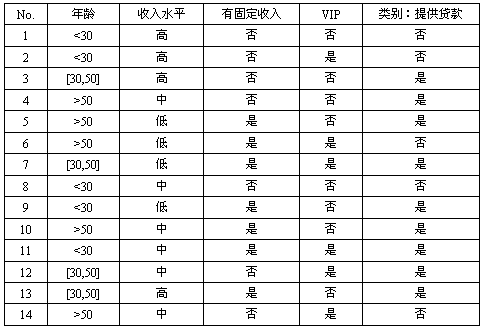
<img style="float: left;"  src="img/decisionTree6.png"  width="40%"> <img style="float: right;"  src="img/decisionTree7.png"  width="60%">
<font color=#DC143C size=4 face="黑体"> 年龄属性和收入水平属性分别划分集合，得到的结果哪个更纯？？？？</font>

## 三、ID3算法
### 1、信息熵的概念：某个随机变量混乱程度越大，其信息量越大，反之，信息量越小说明该随机变量越不混乱（越纯）
### (1)自信息:只考虑某个随机变量自身的某种可能性发生时，其所产生的信息量。I(x=x0)=log(1/P(x=x0))
*  当我们讨论信息量的是时候一定要限定一个范围(指定的样本空间范围内)，否则无法量化衡量信息量。
*  通俗化解释：概率越大的事情发生，其信息量越小；概率越小的事情发生，其信息量越大。所以用概率的倒数
*  为什么要对其取对数？因为我们希望两个独立事件发生后其信息量可以直接相加
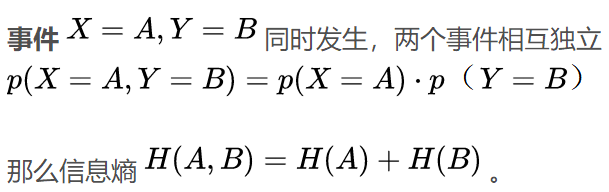
*  以2为底，所得的信息量单位为bit。以e为底，所得的信息量单位为nat.

### (2)信息熵：某个随机变量所有可能事件的信息量加权平均： 熵是一个平均混乱度的平均表达.
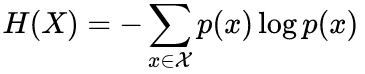
### (3)互信息：Mutual Information，缩写为I，表示两个随机变量X与Y是否有关系，以及关系的强弱
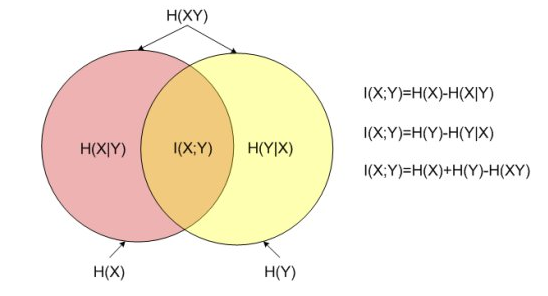
<font color=#DC143C size=4 face="黑体">  H(Y|X):条件熵，I(Y,X):互信息，H(Y,X):联合熵</font>

## 计算公式： I（Y，X） = H（Y） - H（Y|X）
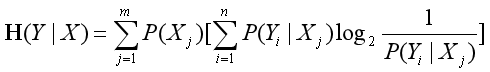
* 可以看出，I（Y，X）可以解释为由X引入而使Y的不确定度减小的量，这个减小的量为 H（Y|X）
* 所以，如果Y，X关系越密切，I（Y，X）就越大
* I（Y，X）最大的取值是H(Y)，此时H（Y|X）为0，意义为X和Y完全相关，在X确定的情况下Y是个定值，没有出现其他不确定情况的概率，所以H（Y|X）为0
* I（Y，X）取0时，代表X与Y什么关系？？？。

###  (4)信息增益:在机器学习中又把这个互信息称为信息增益
<font color=#DC143C size=4 face="黑体"> 
 求解问题描述：目标变量是Y，其中某个特征变量（特征属性）是X;Y的取值有n种，X的取值有m种。求解的问题是：在X属性确定的情况下Y的信息量到底减小了多少？(Y在X确定的情况下其信息量减少的越多，说明Y被划分的越纯。)也就是求X和Y这两个随机变量的互信息I(X,Y)</font>

<img style="float: left;"  src="img/decisionTree5.png"  width="50%"> 
<img style="float: right;"  src="img/decisionTree15.png"  width="50%"> 
<img style="float: right;"  src="img/decisionTree16.png"  width="50%"> 
<img style="float: right;"  src="img/decisionTree17.png"  width="50%"> 

<img style="float: right;"  src="img/decisionTree18.png"  width="50%"> 
<img style="float: right;"  src="img/decisionTree19.png"  width="50%"> 
<img style="float: right;"  src="img/decisionTree20.png"  width="50%"> 

<font color=#DC143C size=4 face="黑体"> 最终决策树</font>

<img style="float: left;"  src="img/decisionTree21.png"  width="40%"> 

## ID3算法的缺点

  ###  (1)、产生分支过多：---泛化能力弱（过拟合）
  * ID3是采用“信息增益”来选择分裂属性的。虽然这是一种有效的方法，但其具有明显的倾向性，即它倾向于选择具有大量不同取值的属性，从而产生许多小而纯的子集。尤其是关系数据库中作为主键的属性，每一个样本都有一个不同的取值。如果以这样的属性作为分裂属性，那么将产生非常多的分支，而且每一个分支产生的子集的熵均为0（因为子集中只有一个样本！）。显然，这样的决策树是没有实际意义的。

 <font color=#DC143C size=3 face="黑体">WHY??</font>
<font color=#006400 size=3 face="黑体">信息增益反映的是：给定一个条件以后目标分类不确定性减少的程度,这必然是分得越细的数据集确定性更高,也就是条件熵越小,信息增益越大</font>

### (2)、要求样本分类均衡：
* 用互信息作为特征选择量存在一个假设，即训练例子集中的正，反例的比例应与实际问题领域里正、反例比例相同。一般情况不能保证相同，这样计算训练集的互信息就有偏差。

### (3)、特征之间相关性强调不够：
* ID3在建树时，每个节点仅含一个特征，是一种单变元的算法，特征间的相关性强调不够。虽然它将多个特征用一棵树连在一起，但联系还是松散的。

### (4)、ID3对噪声较为敏感。
* 关于什么是噪声，Quinlan的定义是训练例子中的错误就是噪声。它包含两方面，一是特征值取错，二是类别给错。

### (5)、ID3算法只能处理分类属性（离散属性），而不能处理连续属性（数值属性）：
* 在处理连续属性时，一般要先将连续属性划分为多个区间，转化为分类属性。例如“年龄”，要把数值事先转换为诸如“小于30岁”、“30至50岁”、“大于50岁”这样的区间，再根据年龄值落入了某一个区间取相应的类别值。通常，区间端点的选取包含着一定的主观因素。

# 四、C4.5算法----"信息增益比例"替代"信息增益"
##  1、信息增益比 = 惩罚参数 * 信息增益  
##  惩罚参数
###  设S代表训练数据集，由s个样本组成。A是S的某个属性，有m个不同的取值，根据这些取值可以把S划分为m个子集，Si表示第i个子集（i=1,2,…,m），|Si|表示子集Si中的样本数量。
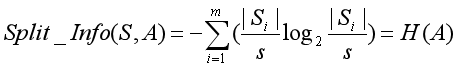
##  "信息增益比"=GainRatio(S,A)=I(Y,A)/H(A)
## 信息增益比的意义：
###  样本在属性A上的取值分布越均匀，Split_Info(S,A)的值就越大,这样避免了“信息增益倾向于选择分支过多属性”的问题。

## 2、连续的特征离散化：
<font color=#006400 size=4 face="黑体">  (1)、设属性X有m个不同的取值，按大小顺序升序排列为v1<v2<,…,<vm  <br>
 (2)、从{v1,v2,…, vm-1}中选择一个vi作为阈值，则可以根据“X≤vi”和“X> vi”将数据集划分为两个部分，形成两个分支。<br>
 (3)、把这些阈值一一取出来，并根据“X≤vi”和“X> vi”把训练数据集划分为两个子集，并计算每一种划分方案下的信息增益或增益比例，选择最大增益或增益比例所对应的那个阈值，作为最优的阈值。<br>
(4)、可以看出，如果选择连续属性作为分裂属性，则分裂后只有两个分支，而不象离散属性那样可能会有多个分支（由离散属性的取值个数决定）。</font>

###  举例：
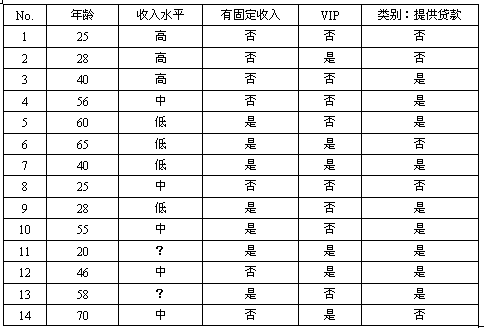
<font  size=4 face="黑体"> 
第一步：如果要计算“年龄”属性的信息增益，则首先将不同的属性值排序{20,25,28,40,46,55,56,58,60,65,70}<br>
第二步：从中依次取出，形成分裂谓词。先取出“20”，谓词“≤20”和“>20”，用它们划分训练数据集，计算并记录增益比例<br>
第三步：选择其中信息增益比最大的阈值，作为最优阈值<br>
第四步：每个连续属性都如此操作，找出属性的最优阈值。<br>
第五步：选择信息增益比最大的属性。
</font>

## 3、缺失值处理
## (1)、将缺失值当作一种单独的属性分类
## (2)、将含有缺失值的样本依据概率平均分配给子节点--残缺样本分支节点概率
*  
<font color=#006400 size=5 face="黑体">问题一：给定划分属性，若样本在该属性上的值是缺失的，那么该如何对这个样本进行划分？（即到底把这个样本划分到哪个结点里？）</font>
<br>
<br>
* 
<font color=#006400 size=5 face="黑体"> 问题二：如何在属性值缺失的情况下进行划分属性的选择？（比如“色泽”这个属性有的样本在该属性上的值是缺失的，那么该如何计算“色泽”的信息增益？）</font>

## 数学公式严谨说明
<img style="float: left;"  src="img/decisionTree30.png"  width="100%">

<img style="float: left;"  src="img/decisionTree31.png"  width="100%" > 

### 示例说明：
<img style="float: left;"  src="img/decisionTree25"  width="150%"> 
<img style="float: left;"  src="img/decisionTree33.png"  width="100%"> 
<img style="float: left;"  src="img/decisionTree34.png"  width="100%"> 
<img style="float: left;"  src="img/decisionTree35.png"  width="100%"> 
<img style="float: left;"  src="img/decisionTree36.png"  width="100%"> 
<img style="float: left;"  src="img/decisionTree37.png"  width="100%"> 
<img style="float: left;"  src="img/decisionTree38.png"  width="100%"> 
<font color=#006400 size=5 face="黑体">
比较发现，“纹理”在所有属性中的信息增益值最大，因此，“纹理”被选为划分属性，用于对根节点进行划分。划分结果为：“纹理=稍糊”分支：{7,9,13,14,17}，“纹理=清晰”分支：{1,2,3,4,5,6,15}，“纹理=模糊”分支：{11,12,16}。如下图所示：</font>
<img style="float: left;"  src="img/decisionTree26"  width="150%"> 

<font color=#006400 size=5 face="黑体">
那么问题来了，编号为{8,10}的样本在“纹理”这个属性上是缺失的，该被划分到哪个分支里？这两个样本会同时进入到三个分支里，只不过进入到每个分支后权重会被调整（在刚开始时每个样本的权重都初始化为1）。编号为8的样本进入到三个分支里后，权重分别调整为5/15，7/15 和 3/15；编号为10的样本同样的操作和权重。因此，经过第一次划分后的决策树如下图所示：</font>
<img style="float: left;"  src="img/decisionTree27" width="100%" > 

<font color=#006400 size=5 face="黑体">
接下来，递归执行“纹理=稍糊”这个分支，样本集D = {7，8，9，10，13，14，17}，共7个样本。如下图所示：</font>
<img style="float: left;"  src="img/decisionTree29" width="100%"  > 
<img style="float: left;"  src="img/decisionTree40.png" width="100%"  > 
<img style="float: left;"  src="img/decisionTree41.png" width="100%"  > 
### 参考书目：
* 1、链接：https://pan.baidu.com/s/1q8yYySPoW6ZDpoRiGIw6_g 
提取码：pgjl 
* 2、https://blog.csdn.net/u012328159/article/details/79413610

## 4、树剪枝操作---预防过拟合
<img style="float: left;"  src="img/guonihe.gif"  width="100%"> 
##  (1)、预剪枝：
### 预剪枝是：决策树生成过程中，对每个节点在继续划分前进行评估，若剪枝不能带来泛化能力的提升则停止剪枝，并且把当前节点当成叶子节点。泛化能力的判定方法：留出法，用测试集测试该节点分支前后的准确率。
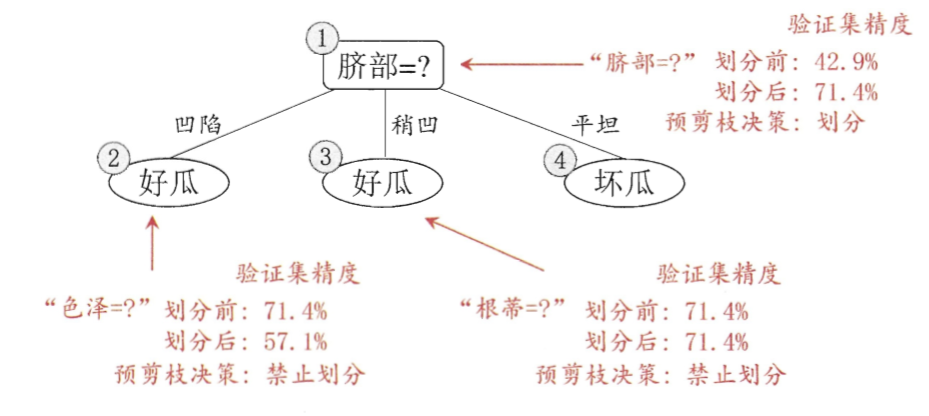
## (2)、后剪枝:
### 后剪枝是：先根据算法生成一棵完整的决策树，然后自底向上对非叶节点进行评估，若该节点对应的子树改成为叶节点能提升泛化能力，则将子树中样本全部放到该节点中，该节点称为叶节点。
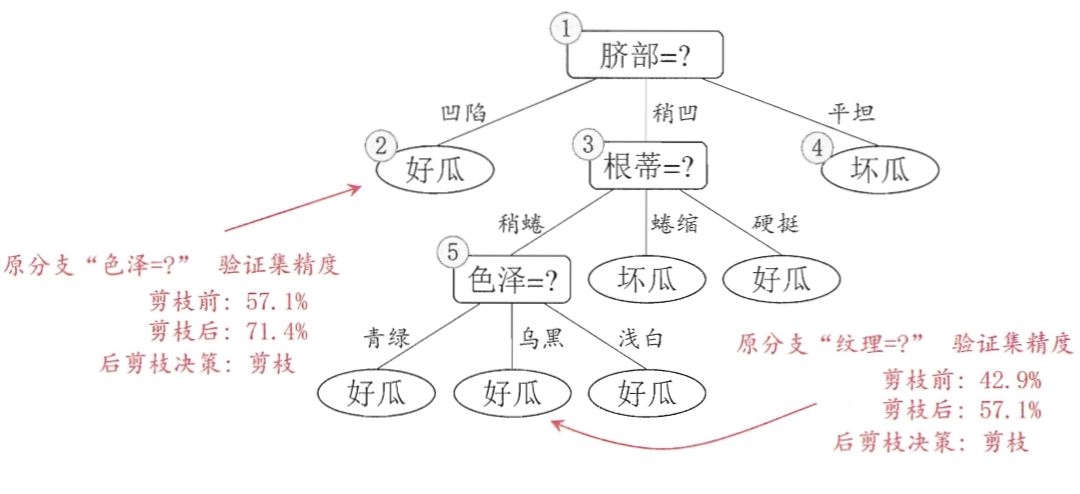
https://blog.csdn.net/u012328159/article/details/79285214

# 五、CART决策树

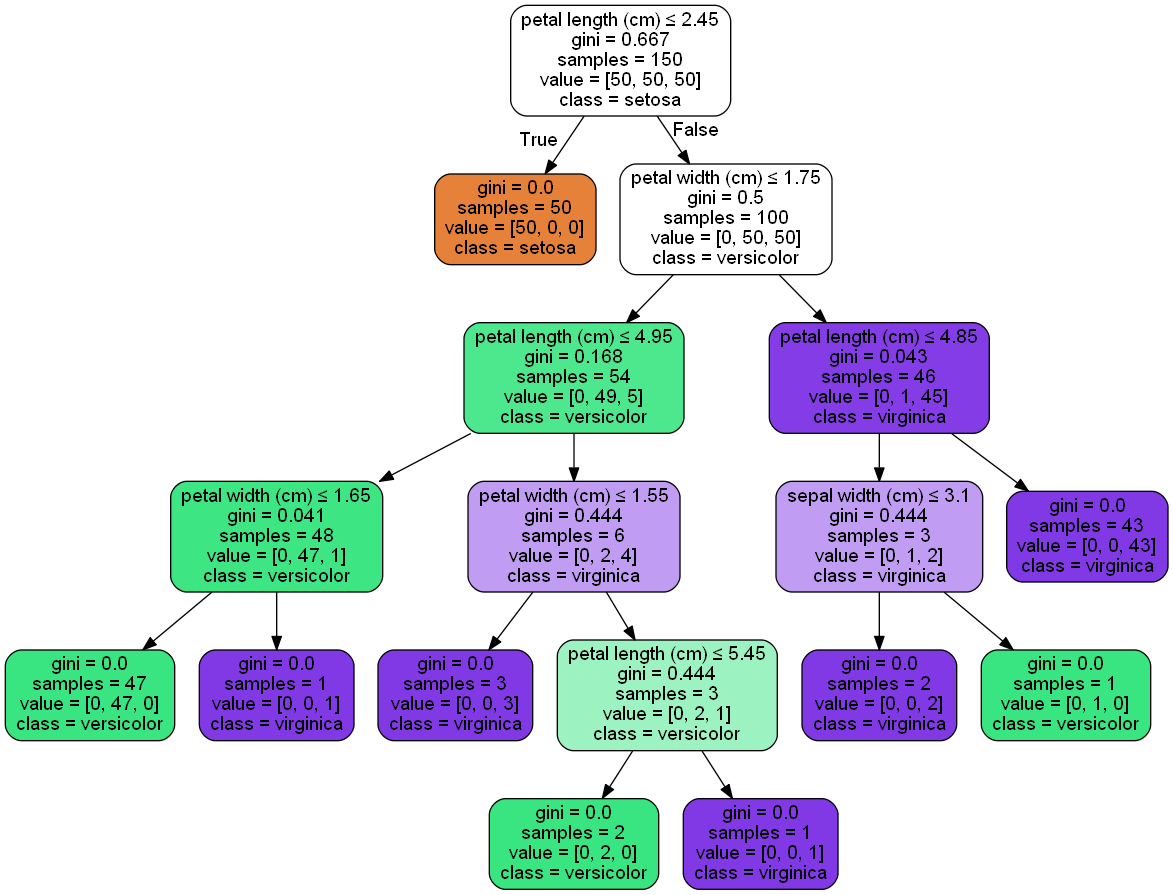

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
import pydotplus
import sys

from IPython.display import Image  
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 
